We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2021-07-23 16:22:38--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:5a00:1d:d83a:40c0:93a1, 2600:9000:21c7:2400:1d:d83a:40c0:93a1, 2600:9000:21c7:d200:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:5a00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
5 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
6 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
7 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
8 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
9 2020-12-05    5     12  2020    235      18             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2                                           6.868768           
3                                           7.134266           
4                                           6.968658           
5                                           6.963401           
6                                           7.094835           
7                                           7.215755           
8                                           7.326160           
9                                           7.115865

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61900
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-01   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-02   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-03   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-04   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-10  35.0  1313.0  202.0  0.0  0.0  752.0  1174.0   75.0  5303.0   
2020-12-11  28.0  1255.0   63.0  0.0  0.0  873.0  1077.0  121.0  6994.0   
2020-12-12  46.0  1196.0  113.0  1.0  0.0  802.0   995.0  136.0  7112.0   
2020-12-13  52.0  1154.0  298.0  1.0  0.0  879.0  1013.0  100.0  5274.0   
2020-12-14  50.0  1194.0  746.0  0.0  0.0  788.0   357.0   27.0  3558.0   

                    ... deaths                                                  
geoId           AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   ZW  
dateRep             ...                                                         
2019-12-31     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-12-10  2913.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0  142.0  0.0  1.0  
2020-12-11  2466.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  173.0  0.0  1.0  
2020-12-12  3026.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  205.0  1.0  1.0  
2020-12-13  2938.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  154.0  1.0  1.0  
2020-12-14  3005.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  170.0  1.0  0.0  

[350 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2021-12-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2021-12-10 NaN NaN NaN NaN NaN NaN NaN  
2021-12-11 NaN NaN NaN NaN NaN NaN NaN  
2021-12-12 NaN NaN NaN NaN NaN NaN NaN  
2021-12-13 NaN NaN NaN NaN NaN NaN NaN  
2021-12-14 NaN NaN NaN NaN NaN NaN NaN  

[715 rows x 428 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    715.000000
mean     357.000000
std      206.547008
min        0.000000
25%      178.500000
50%      357.000000
75%      535.500000
max      714.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

wave = -1

df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

plotlist = [(smeasure, country), (pmeasure, country)]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [10]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
#mincases = popdata / 1e6
#mincases = 100
mincases = 2
#mincases = max(popdata / 1e6, 2)
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 2


# Iterate here

In [11]:
wave += 1
curwave = wmeasure + str(wave)
df_geo[(curwave, country)] = 0
plotlist += [(curwave, country)]

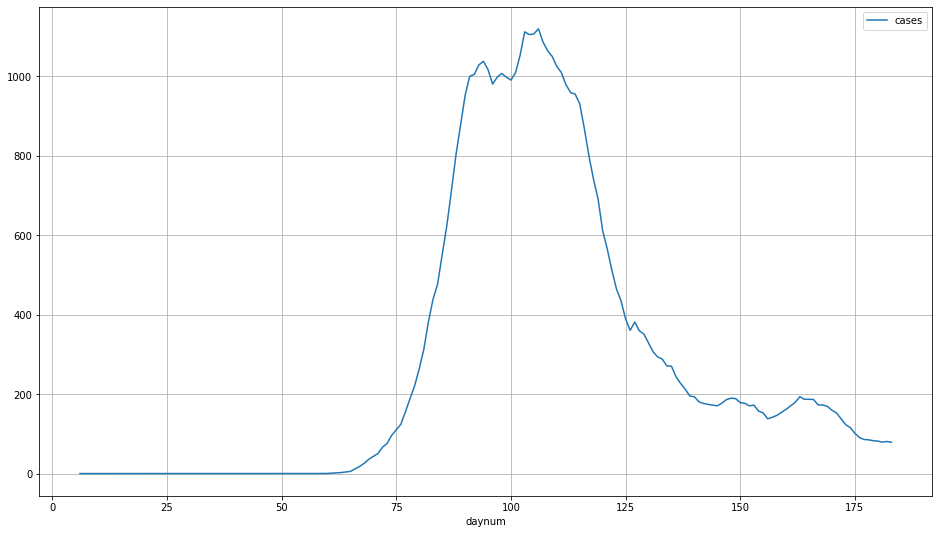

In [12]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred[df_pred[measure].notnull()].loc['20200101':'20200701'].plot(x='daynum', y=measure, figsize=(16, 9), grid=True)

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

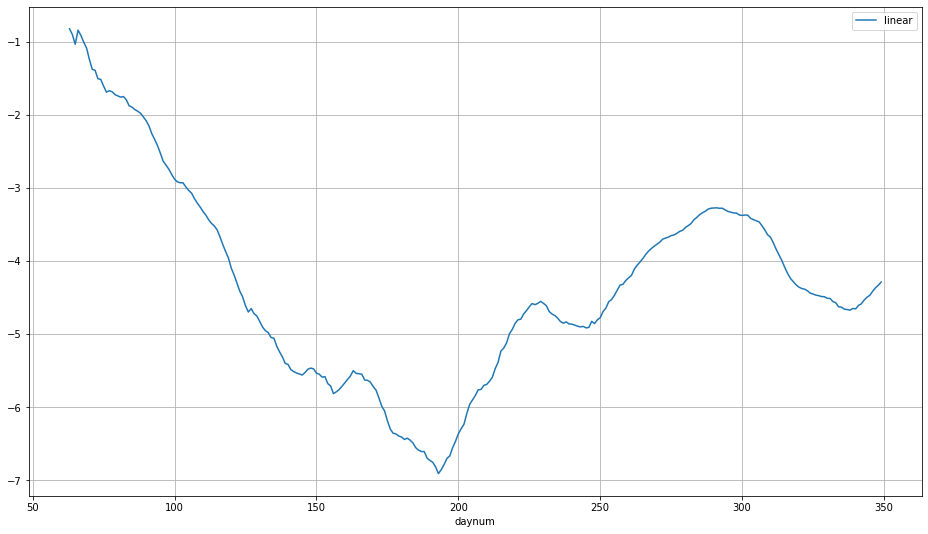

In [13]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

df_pred['linear'] = np.log(df_pred['gumdiv'])

#df_pred = df_pred[(df_pred['linear'] < -0.4) &
#                  (df_pred['linear'] > -4.0)]

df_pred.plot(x='daynum', y='linear', figsize=(16, 9), grid=True)

(array([ 63.,  63.,  72.,  81.,  90.,  99., 117., 126., 135., 144., 153.,
       162., 171., 180., 189., 194., 198., 206., 224., 242., 251., 260.,
       278., 296., 305., 314., 323., 332., 341., 349., 349.]), array([-0.76667735, -1.40169091, -1.77257001, -2.11024792, -2.75976588,
       -3.74551113, -4.64220546, -5.1413137 , -5.53196671, -5.6538233 ,
       -5.59010815, -5.80174922, -6.43147462, -6.71633653, -6.79829834,
       -6.57206315, -5.90149026, -4.60198257, -4.89941696, -4.72696857,
       -4.18031088, -3.51810152, -3.25944367, -3.43787683, -4.00666858,
       -4.44324004, -4.58687433, -4.63237729, -4.30959725,  0.        ,
        0.        ]), 1)
            daynum        cases    gumdiv    linear    spline
2020-03-03      63     2.571429  0.439024 -0.823200 -0.766677
2020-03-03      63     2.571429  0.439024 -0.823200 -1.401691
2020-03-12      72    66.428571  0.248796 -1.391121 -1.772570
2020-03-21      81   312.857143  0.172210 -1.759038 -2.110248
2020-03-30      90   95

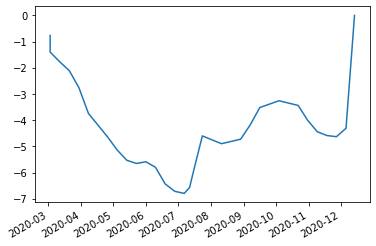

In [30]:
from scipy.interpolate import splrep

model = splrep(df_pred['daynum'], df_pred['linear'], s=1, k=1)

df_knot = pd.merge(df_pred, pd.DataFrame(model[1], model[0]), how='inner', left_on="daynum", right_index=True)

print(model)
df_knot.rename(columns={0: 'spline'}, inplace=True)
print(df_knot)
df_knot['spline'].plot()

From 63 to 349


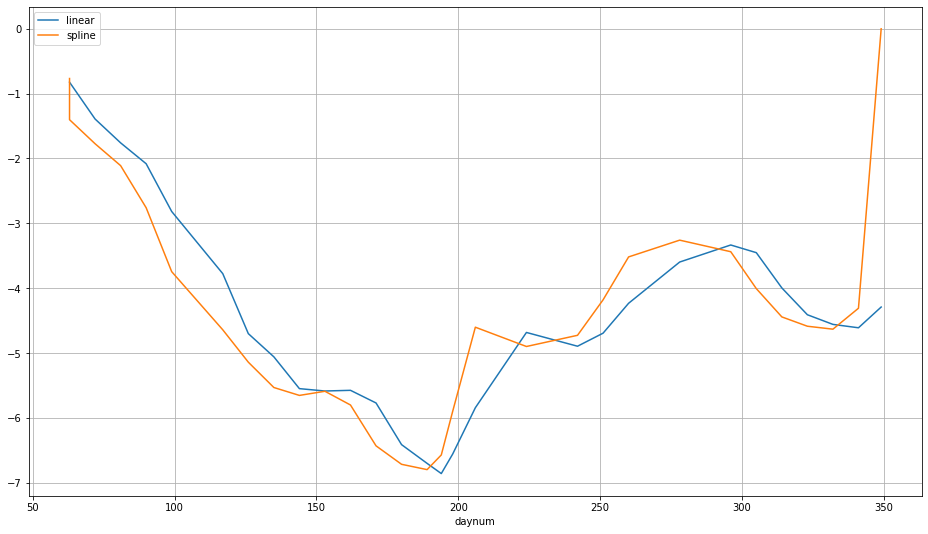

In [33]:
#df_knot['earth'] = model[1][0:-4]

daymin = df_knot['daynum'].min()
daymax = df_knot['daynum'].max()
print('From {} to {}'.format(daymin, daymax))

df_knot.plot(x='daynum', y=['linear', 'spline'], figsize=(16, 9), grid=True)

In [34]:
#df_pred['gbgrad'] = np.gradient(df_pred['linear'])
#df_pred['eagrad'] = np.gradient(df_pred['earth'])

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred.loc['20200101':'20200701'].plot(x='daynum', y=['gbgrad', 'eagrad'], figsize=(16, 9), grid=True)

In [ ]:
#from pyearth import export
#fitmod = export.export_python_function(model)
#print(export.export_python_string(model))

In [35]:
#df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
#                   (df_pred['daynum'] == (daymin + 1)) |
#                   (df_pred['daynum'] == daymax))
df_knot['daycount'] = df_knot.reset_index().index
df_knot

daynum        cases    gumdiv    linear    spline  daycount
2020-03-03      63     2.571429  0.439024 -0.823200 -0.766677         0
2020-03-03      63     2.571429  0.439024 -0.823200 -1.401691         1
2020-03-12      72    66.428571  0.248796 -1.391121 -1.772570         2
2020-03-21      81   312.857143  0.172210 -1.759038 -2.110248         3
2020-03-30      90   951.714286  0.124796 -2.081073 -2.759766         4
2020-04-08      99   997.857143  0.059754 -2.817511 -3.745511         5
2020-04-26     117   800.142857  0.022909 -3.776229 -4.642205         6
2020-05-05     126   360.714286  0.009086 -4.701027 -5.141314         7
2020-05-14     135   270.285714  0.006352 -5.058986 -5.531967         8
2020-05-23     144   172.428571  0.003890 -5.549369 -5.653823         9
2020-06-01     153   172.285714  0.003750 -5.585894 -5.590108        10
2020-06-10     162   179.428571  0.003790 -5.575328 -5.801749        11
2020-06-19     171   152.571429  0.003119 -5.770315 -6.431475        12
2020-06-28     180    81.714286  0.001640 -6.413029 -6.716337        13
2020-07-07     189    62.000000  0.001228 -6.702122 -6.798298        14
2020-07-12     194    53.285714  0.001050 -6.859075 -6.572063        15
2020-07-16     198    72.285714  0.001417 -6.559156 -5.901490        16
2020-07-24     206   150.428571  0.002898 -5.843828 -4.601983        17
2020-08-11     224   532.000000  0.009252 -4.682919 -4.899417        18
2020-08-29     242   505.285714  0.007482 -4.895239 -4.726969        19
2020-09-07     251   663.428571  0.009148 -4.694230 -4.180311        20
2020-09-16     260  1174.571429  0.014508 -4.233082 -3.518102        21
2020-10-04     278  3318.285714  0.027406 -3.597007 -3.259444        22
2020-10-22     296  8129.714286  0.035649 -3.334026 -3.437877        23
2020-10-31     305  9840.285714  0.031671 -3.452346 -4.006669        24
2020-11-09     314  7162.285714  0.018385 -3.996214 -4.443240        25
2020-11-18     323  5363.142857  0.012157 -4.409866 -4.586874        26
2020-11-27     332  5116.142857  0.010477 -4.558579 -4.632377        27
2020-12-06     341  5298.428571  0.009943 -4.610903 -4.309597        28
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        29
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        30

In [36]:
#df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

#df_knot['eadiff'] = df_knot['eagrad'] - df_knot['eagrad'].shift(1)
#df_knot['eamax'] = np.maximum.accumulate(df_knot['eagrad'])

df_knot

daynum        cases    gumdiv    linear    spline  daycount  \
2020-03-03      63     2.571429  0.439024 -0.823200 -0.766677         0   
2020-03-03      63     2.571429  0.439024 -0.823200 -1.401691         1   
2020-03-12      72    66.428571  0.248796 -1.391121 -1.772570         2   
2020-03-21      81   312.857143  0.172210 -1.759038 -2.110248         3   
2020-03-30      90   951.714286  0.124796 -2.081073 -2.759766         4   
2020-04-08      99   997.857143  0.059754 -2.817511 -3.745511         5   
2020-04-26     117   800.142857  0.022909 -3.776229 -4.642205         6   
2020-05-05     126   360.714286  0.009086 -4.701027 -5.141314         7   
2020-05-14     135   270.285714  0.006352 -5.058986 -5.531967         8   
2020-05-23     144   172.428571  0.003890 -5.549369 -5.653823         9   
2020-06-01     153   172.285714  0.003750 -5.585894 -5.590108        10   
2020-06-10     162   179.428571  0.003790 -5.575328 -5.801749        11   
2020-06-19     171   152.571429  0.003119 -5.770315 -6.431475        12   
2020-06-28     180    81.714286  0.001640 -6.413029 -6.716337        13   
2020-07-07     189    62.000000  0.001228 -6.702122 -6.798298        14   
2020-07-12     194    53.285714  0.001050 -6.859075 -6.572063        15   
2020-07-16     198    72.285714  0.001417 -6.559156 -5.901490        16   
2020-07-24     206   150.428571  0.002898 -5.843828 -4.601983        17   
2020-08-11     224   532.000000  0.009252 -4.682919 -4.899417        18   
2020-08-29     242   505.285714  0.007482 -4.895239 -4.726969        19   
2020-09-07     251   663.428571  0.009148 -4.694230 -4.180311        20   
2020-09-16     260  1174.571429  0.014508 -4.233082 -3.518102        21   
2020-10-04     278  3318.285714  0.027406 -3.597007 -3.259444        22   
2020-10-22     296  8129.714286  0.035649 -3.334026 -3.437877        23   
2020-10-31     305  9840.285714  0.031671 -3.452346 -4.006669        24   
2020-11-09     314  7162.285714  0.018385 -3.996214 -4.443240        25   
2020-11-18     323  5363.142857  0.012157 -4.409866 -4.586874        26   
2020-11-27     332  5116.142857  0.010477 -4.558579 -4.632377        27   
2020-12-06     341  5298.428571  0.009943 -4.610903 -4.309597        28   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        29   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        30   

            daysdata  daystime  
2020-03-03       1.0       0.0  
2020-03-03       1.0       9.0  
2020-03-12       1.0       9.0  
2020-03-21       1.0       9.0  
2020-03-30       1.0       9.0  
2020-04-08       1.0      18.0  
2020-04-26       1.0       9.0  
2020-05-05       1.0       9.0  
2020-05-14       1.0       9.0  
2020-05-23       1.0       9.0  
2020-06-01       1.0       9.0  
2020-06-10       1.0       9.0  
2020-06-19       1.0       9.0  
2020-06-28       1.0       9.0  
2020-07-07       1.0       5.0  
2020-07-12       1.0       4.0  
2020-07-16       1.0       8.0  
2020-07-24       1.0      18.0  
2020-08-11       1.0      18.0  
2020-08-29       1.0       9.0  
2020-09-07       1.0       9.0  
2020-09-16       1.0      18.0  
2020-10-04       1.0      18.0  
2020-10-22       1.0       9.0  
2020-10-31       1.0       9.0  
2020-11-09       1.0       9.0  
2020-11-18       1.0       9.0  
2020-11-27       1.0       9.0  
2020-12-06       1.0       8.0  
2020-12-14       1.0       0.0  
2020-12-14       NaN       NaN

In [40]:
df_knot['cand'] = ((df_knot['daysdata'] >= 1)) #&
#                   (df_knot['eagrad'] < -1/40))# &
#                   (df_knot['daysdata'] == df_knot['daystime']))
df_knot

daynum        cases    gumdiv    linear    spline  daycount  \
2020-03-03      63     2.571429  0.439024 -0.823200 -0.766677         0   
2020-03-03      63     2.571429  0.439024 -0.823200 -1.401691         1   
2020-03-12      72    66.428571  0.248796 -1.391121 -1.772570         2   
2020-03-21      81   312.857143  0.172210 -1.759038 -2.110248         3   
2020-03-30      90   951.714286  0.124796 -2.081073 -2.759766         4   
2020-04-08      99   997.857143  0.059754 -2.817511 -3.745511         5   
2020-04-26     117   800.142857  0.022909 -3.776229 -4.642205         6   
2020-05-05     126   360.714286  0.009086 -4.701027 -5.141314         7   
2020-05-14     135   270.285714  0.006352 -5.058986 -5.531967         8   
2020-05-23     144   172.428571  0.003890 -5.549369 -5.653823         9   
2020-06-01     153   172.285714  0.003750 -5.585894 -5.590108        10   
2020-06-10     162   179.428571  0.003790 -5.575328 -5.801749        11   
2020-06-19     171   152.571429  0.003119 -5.770315 -6.431475        12   
2020-06-28     180    81.714286  0.001640 -6.413029 -6.716337        13   
2020-07-07     189    62.000000  0.001228 -6.702122 -6.798298        14   
2020-07-12     194    53.285714  0.001050 -6.859075 -6.572063        15   
2020-07-16     198    72.285714  0.001417 -6.559156 -5.901490        16   
2020-07-24     206   150.428571  0.002898 -5.843828 -4.601983        17   
2020-08-11     224   532.000000  0.009252 -4.682919 -4.899417        18   
2020-08-29     242   505.285714  0.007482 -4.895239 -4.726969        19   
2020-09-07     251   663.428571  0.009148 -4.694230 -4.180311        20   
2020-09-16     260  1174.571429  0.014508 -4.233082 -3.518102        21   
2020-10-04     278  3318.285714  0.027406 -3.597007 -3.259444        22   
2020-10-22     296  8129.714286  0.035649 -3.334026 -3.437877        23   
2020-10-31     305  9840.285714  0.031671 -3.452346 -4.006669        24   
2020-11-09     314  7162.285714  0.018385 -3.996214 -4.443240        25   
2020-11-18     323  5363.142857  0.012157 -4.409866 -4.586874        26   
2020-11-27     332  5116.142857  0.010477 -4.558579 -4.632377        27   
2020-12-06     341  5298.428571  0.009943 -4.610903 -4.309597        28   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        29   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        30   

            daysdata  daystime   cand  
2020-03-03       1.0       0.0   True  
2020-03-03       1.0       9.0   True  
2020-03-12       1.0       9.0   True  
2020-03-21       1.0       9.0   True  
2020-03-30       1.0       9.0   True  
2020-04-08       1.0      18.0   True  
2020-04-26       1.0       9.0   True  
2020-05-05       1.0       9.0   True  
2020-05-14       1.0       9.0   True  
2020-05-23       1.0       9.0   True  
2020-06-01       1.0       9.0   True  
2020-06-10       1.0       9.0   True  
2020-06-19       1.0       9.0   True  
2020-06-28       1.0       9.0   True  
2020-07-07       1.0       5.0   True  
2020-07-12       1.0       4.0   True  
2020-07-16       1.0       8.0   True  
2020-07-24       1.0      18.0   True  
2020-08-11       1.0      18.0   True  
2020-08-29       1.0       9.0   True  
2020-09-07       1.0       9.0   True  
2020-09-16       1.0      18.0   True  
2020-10-04       1.0      18.0   True  
2020-10-22       1.0       9.0   True  
2020-10-31       1.0       9.0   True  
2020-11-09       1.0       9.0   True  
2020-11-18       1.0       9.0   True  
2020-11-27       1.0       9.0   True  
2020-12-06       1.0       8.0   True  
2020-12-14       1.0       0.0   True  
2020-12-14       NaN       NaN  False

In [42]:
df_knot['since'] = df_knot['daynum'] - daymin
#df_knot['score'] = - df_knot['eagrad']
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata'] / df_knot['daystime']
#df_knot['score'] = - df_knot['eagrad'] / df_knot['since']
#df_knot['score'] = (df_knot['eagrad'] ** 2) / np.sqrt(df_knot['since'])
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
df_knot['score'] = np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
df_knot

daynum        cases    gumdiv    linear    spline  daycount  \
2020-03-03      63     2.571429  0.439024 -0.823200 -0.766677         0   
2020-03-03      63     2.571429  0.439024 -0.823200 -1.401691         1   
2020-03-12      72    66.428571  0.248796 -1.391121 -1.772570         2   
2020-03-21      81   312.857143  0.172210 -1.759038 -2.110248         3   
2020-03-30      90   951.714286  0.124796 -2.081073 -2.759766         4   
2020-04-08      99   997.857143  0.059754 -2.817511 -3.745511         5   
2020-04-26     117   800.142857  0.022909 -3.776229 -4.642205         6   
2020-05-05     126   360.714286  0.009086 -4.701027 -5.141314         7   
2020-05-14     135   270.285714  0.006352 -5.058986 -5.531967         8   
2020-05-23     144   172.428571  0.003890 -5.549369 -5.653823         9   
2020-06-01     153   172.285714  0.003750 -5.585894 -5.590108        10   
2020-06-10     162   179.428571  0.003790 -5.575328 -5.801749        11   
2020-06-19     171   152.571429  0.003119 -5.770315 -6.431475        12   
2020-06-28     180    81.714286  0.001640 -6.413029 -6.716337        13   
2020-07-07     189    62.000000  0.001228 -6.702122 -6.798298        14   
2020-07-12     194    53.285714  0.001050 -6.859075 -6.572063        15   
2020-07-16     198    72.285714  0.001417 -6.559156 -5.901490        16   
2020-07-24     206   150.428571  0.002898 -5.843828 -4.601983        17   
2020-08-11     224   532.000000  0.009252 -4.682919 -4.899417        18   
2020-08-29     242   505.285714  0.007482 -4.895239 -4.726969        19   
2020-09-07     251   663.428571  0.009148 -4.694230 -4.180311        20   
2020-09-16     260  1174.571429  0.014508 -4.233082 -3.518102        21   
2020-10-04     278  3318.285714  0.027406 -3.597007 -3.259444        22   
2020-10-22     296  8129.714286  0.035649 -3.334026 -3.437877        23   
2020-10-31     305  9840.285714  0.031671 -3.452346 -4.006669        24   
2020-11-09     314  7162.285714  0.018385 -3.996214 -4.443240        25   
2020-11-18     323  5363.142857  0.012157 -4.409866 -4.586874        26   
2020-11-27     332  5116.142857  0.010477 -4.558579 -4.632377        27   
2020-12-06     341  5298.428571  0.009943 -4.610903 -4.309597        28   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        29   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        30   

            daysdata  daystime   cand  since     score  
2020-03-03       1.0       0.0   True      0       inf  
2020-03-03       1.0       9.0   True      0       inf  
2020-03-12       1.0       9.0   True      9  0.577350  
2020-03-21       1.0       9.0   True     18  0.485492  
2020-03-30       1.0       9.0   True     27  0.438691  
2020-04-08       1.0      18.0   True     36  0.408248  
2020-04-26       1.0       9.0   True     54  0.368894  
2020-05-05       1.0       9.0   True     63  0.354948  
2020-05-14       1.0       9.0   True     72  0.343295  
2020-05-23       1.0       9.0   True     81  0.333333  
2020-06-01       1.0       9.0   True     90  0.324668  
2020-06-10       1.0       9.0   True     99  0.317023  
2020-06-19       1.0       9.0   True    108  0.310202  
2020-06-28       1.0       9.0   True    117  0.304056  
2020-07-07       1.0       5.0   True    126  0.298475  
2020-07-12       1.0       4.0   True    131  0.295585  
2020-07-16       1.0       8.0   True    135  0.293371  
2020-07-24       1.0      18.0   True    143  0.289178  
2020-08-11       1.0      18.0   True    161  0.280733  
2020-08-29       1.0       9.0   True    179  0.273393  
2020-09-07       1.0       9.0   True    188  0.270060  
2020-09-16       1.0      18.0   True    197  0.266921  
2020-10-04       1.0      18.0   True    215  0.261150  
2020-10-22       1.0       9.0   True    233  0.255953  
2020-10-31       1.0       9.0   True    242  0.253540  
2020-11-09       1.0       9.0   True    251  0.251236  
2020-11-18       1.0       9.0   True    260  0.249033  
2020-11-27     

In [43]:
df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()
df_knot

daynum        cases    gumdiv    linear    spline  daycount  \
2020-03-03      63     2.571429  0.439024 -0.823200 -0.766677         0   
2020-03-03      63     2.571429  0.439024 -0.823200 -1.401691         1   
2020-03-12      72    66.428571  0.248796 -1.391121 -1.772570         2   
2020-03-21      81   312.857143  0.172210 -1.759038 -2.110248         3   
2020-03-30      90   951.714286  0.124796 -2.081073 -2.759766         4   
2020-04-08      99   997.857143  0.059754 -2.817511 -3.745511         5   
2020-04-26     117   800.142857  0.022909 -3.776229 -4.642205         6   
2020-05-05     126   360.714286  0.009086 -4.701027 -5.141314         7   
2020-05-14     135   270.285714  0.006352 -5.058986 -5.531967         8   
2020-05-23     144   172.428571  0.003890 -5.549369 -5.653823         9   
2020-06-01     153   172.285714  0.003750 -5.585894 -5.590108        10   
2020-06-10     162   179.428571  0.003790 -5.575328 -5.801749        11   
2020-06-19     171   152.571429  0.003119 -5.770315 -6.431475        12   
2020-06-28     180    81.714286  0.001640 -6.413029 -6.716337        13   
2020-07-07     189    62.000000  0.001228 -6.702122 -6.798298        14   
2020-07-12     194    53.285714  0.001050 -6.859075 -6.572063        15   
2020-07-16     198    72.285714  0.001417 -6.559156 -5.901490        16   
2020-07-24     206   150.428571  0.002898 -5.843828 -4.601983        17   
2020-08-11     224   532.000000  0.009252 -4.682919 -4.899417        18   
2020-08-29     242   505.285714  0.007482 -4.895239 -4.726969        19   
2020-09-07     251   663.428571  0.009148 -4.694230 -4.180311        20   
2020-09-16     260  1174.571429  0.014508 -4.233082 -3.518102        21   
2020-10-04     278  3318.285714  0.027406 -3.597007 -3.259444        22   
2020-10-22     296  8129.714286  0.035649 -3.334026 -3.437877        23   
2020-10-31     305  9840.285714  0.031671 -3.452346 -4.006669        24   
2020-11-09     314  7162.285714  0.018385 -3.996214 -4.443240        25   
2020-11-18     323  5363.142857  0.012157 -4.409866 -4.586874        26   
2020-11-27     332  5116.142857  0.010477 -4.558579 -4.632377        27   
2020-12-06     341  5298.428571  0.009943 -4.610903 -4.309597        28   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        29   
2020-12-14     349  8027.571429  0.013692 -4.290934  0.000000        30   

            daysdata  daystime   cand  since     score  choice  
2020-03-03       1.0       0.0   True      0       inf    True  
2020-03-03       1.0       9.0   True      0       inf    True  
2020-03-12       1.0       9.0   True      9  0.577350   False  
2020-03-21       1.0       9.0   True     18  0.485492   False  
2020-03-30       1.0       9.0   True     27  0.438691   False  
2020-04-08       1.0      18.0   True     36  0.408248   False  
2020-04-26       1.0       9.0   True     54  0.368894   False  
2020-05-05       1.0       9.0   True     63  0.354948   False  
2020-05-14       1.0       9.0   True     72  0.343295   False  
2020-05-23       1.0       9.0   True     81  0.333333   False  
2020-06-01       1.0       9.0   True     90  0.324668   False  
2020-06-10       1.0       9.0   True     99  0.317023   False  
2020-06-19       1.0       9.0   True    108  0.310202   False  
2020-06-28       1.0       9.0   True    117  0.304056   False  
2020-07-07       1.0       5.0   True    126  0.298475   False  
2020-07-12       1.0       4.0   True    131  0.295585   False  
2020-07-16       1.0       8.0   True    135  0.293371   False  
2020-07-24       1.0      18.0   True    143  0.289178   False  
2020-08-11       1.0      18.0   True    161  0.280733   False  
2020-08-29       1.0       9.0   True    179  0.273393   False  
2020-09-07       1.0       9.0   True    188  0.270060   False  
2020-09-16       1.0      18.0   True    197  0.266921   False  
2020-10-04       1.0      18.0   True    215  0.261150   False  
2020-10-22       1.0       9.0   True    233  0.255

In [ ]:
choice = df_knot[df_knot['choice']]
lower = choice['daynum'].values[0]
upper = choice['daysdata'].values[0] + lower
print('From {} to {}'.format(lower, upper))

From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [ ]:
#lower = 185
#upper = 187

df_pred = df_pred[(df_pred['daynum'] >= lower) &
                  (df_pred['daynum'] <= upper)].copy()

slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
intercept = fitmod([[lower]])[0] - (lower * slope)

print('From {} to {} with slope {:1.4f} and intercept {:1.3f}'.format(
    lower, upper, slope, intercept))

beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

#final = np.exp(np.log(df_pred['scale']).mean())
final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

In [ ]:
df_pred

Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

In [ ]:
df_geo[(curwave, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
df_geo[plotlist].loc['20200101':'20200701'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

In [ ]:
df_geo[plotlist].loc['20200101':'20200701'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [ ]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

The peak can be found at the first predicted value that is larger than the next.

In [ ]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

This date should closely match the `mu` of our distribution, in days since the start of the index.

In [ ]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [ ]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [ ]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

We define the maximum delta as the day in the curve with the sharpest rise.

In [ ]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

This should match the maximum gradient of the daily data.

In [ ]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Back to the original curve, showing the number of infected concurrently.

In [ ]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [ ]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

In [ ]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [ ]:
df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]

Keep exploring! Stay home, wash your hands, keep your distance.